# Lasso Notebook

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('housing1.csv', index_col=0)
housing.shape

(2578, 90)

In [46]:
housing

,px_ft,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle_Gable,RoofMatl_CompShg,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,MoSold,YrSold,FullBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,...,GarageFinish__RFn,BldgType__2fmCon,BldgType__Duplex,BldgType__Twnhs,BldgType__TwnhsE,LotConfig__Corner,LotConfig__CulDSac,LotConfig__FR2,LotConfig__FR3,HouseStyle__1.5Fin,HouseStyle__1.5Unf,HouseStyle__2.5Fin,HouseStyle__2.5Unf,HouseStyle__2Story,HouseStyle__SFoyer,HouseStyle__SLvl,Condition1__Artery,Condition1__Feedr,Condition1__PosA,Condition1__PosN,Condition1__RRAe,Condition1__RRAn,Condition1__RRNe,Condition1__RRNn,ISU_dist
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,129.830918,4,3,6,5,1960,1960,0,1,3,3,3,4,4,4,1,2,1,5,2010,1,3,1,3,7,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.960966
526302030,115.931941,4,3,6,5,1954,1954,0,1,3,3,3,3,1,4,3,4,1,5,2006,2,2,1,3,5,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.942904
526302040,153.808594,4,3,6,6,1956,1956,0,1,3,4,3,3,1,3,1,3,1,8,2006,1,2,1,4,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.944856
526302110,141.156463,4,3,6,5,1956,1956,1,1,3,3,2,2,1,3,1,3,1,10,2009,1,2,1,3,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.862990
526302120,94.045632,4,3,5,5,1957,1957,1,1,3,3,3,3,2,3,1,2,1,6,2006,1,3,1,3,7,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.861618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924100070,122.390209,4,2,5,5,1974,1975,1,1,3,3,4,3,3,5,2,4,1,4,2006,1,2,1,3,6,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.189515
924151040,158.069884,4,2,8,5,1994,1995,0,1,4,4,4,4,4,6,2,5,1,2,2010,2,3,1,4,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.714981
924151050,94.000000,4,2,7,5,1993,1994,1,1,3,3,4,3,3,2,1,5,1,11,2006,2,3,1,3,9,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.752959


In [47]:
housetarg = pd.Series(housing.px_ft, name='target')
housefeature = housing.drop('px_ft',axis=1)

In [77]:
housetarg

PID
526301100     129.830918
526302030     115.931941
526302040     153.808594
526302110     141.156463
526302120      94.045632
                 ...    
924100070     122.390209
924151040     158.069884
924151050      94.000000
924152030     128.547579
1007100110     56.100218
Name: target, Length: 2578, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(housefeature, housetarg)
Xtrain.shape, Xtest.shape

((1933, 89), (645, 89))

In [49]:
import numpy as np
alphas = np.linspace(0.00001,10,100)
#.0001-.001, 

### Lasso Gridsearch CV

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#randomized is faster
from sklearn.linear_model import Lasso

In [51]:
lasso = Lasso(normalize=True)

In [52]:
grid = GridSearchCV(estimator=lasso, param_grid={'alpha':alphas}, cv=10, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.00000e-05, 1.01020e-01, 2.02030e-01, 3.03040e-01, 4.04050e-01,
       5.05060e-01, 6.06070e-01, 7.07080e-01, 8.08090e-01, 9.09100e-01,
       1.01011e+00, 1.11112e+00, 1.21213e+00, 1.31314e+00, 1.41415e+00,
       1.51516e+00, 1.61617e+00, 1.71718e+00, 1.81819e+00, 1.91920e+00,
       2.02021e+00, 2.12122e+00, 2.22223e...
       7.07071e+00, 7.17172e+00, 7.27273e+00, 7.37374e+00, 7.47475e+00,
       7.57576e+00, 7.67677e+00, 7.77778e+00, 7.87879e+00, 7.97980e+00,
       8.08081e+00, 8.18182e+00, 8.28283e+00, 8.38384e+00, 8.48485e+00,
       8.58586e+00, 8.68687e+00, 8.78788e+00, 8.88889e+00, 8.98990e+00,
       9.09091e+00, 9.19192e+00, 9.29293e+00, 9.39394e+00, 9.49495e+00,
       9.59596e+00, 9.69697e+00, 9.79798e+00, 9.89899e+00, 1.00000e+01])},
             return_train_score=True)

In [53]:
grid.score(Xtest,ytest)

0.7372540222203403

In [54]:
best_model = grid.best_estimator_
best_model.score(Xtest, ytest)

0.7372540222203403

In [55]:
best_model.coef_

array([-9.40460731e-01, -1.70802489e+00,  4.72217961e+00,  4.47686259e+00,
        2.85595445e-01,  5.39795209e-02, -2.12686041e+00,  3.90442885e+00,
        4.78155157e+00, -8.68632461e-01,  2.74291058e+00, -3.03107725e+00,
        3.38642839e+00,  1.87725296e+00,  1.82459574e-01,  1.66022745e+00,
        2.70178821e+00, -3.68199820e-02, -4.17776782e-01, -4.98600923e+00,
       -5.20030138e+00,  9.22264926e-01,  1.91304111e+00, -1.98934270e+00,
       -1.24354362e-01,  4.45838773e+00,  1.26391840e+00,  2.92885799e-01,
        2.93744069e-03, -2.52438431e-03,  5.25718759e-03,  2.29489861e-03,
        1.47755154e-02,  1.49407398e-02,  1.24244975e-01,  4.30689045e-01,
       -1.66232267e+00, -3.38868879e+00, -2.02565871e+00,  3.62122239e+00,
       -9.62023713e-01, -1.32058984e+00, -3.82283700e+00, -2.05295162e+00,
       -1.46016059e+01, -3.26940191e+00,  1.05261023e+00,  5.75829684e+00,
       -1.48503087e+01,  1.41004142e+01, -1.88103346e+01, -2.29897145e+01,
       -1.45157635e+01, -

In [56]:
print(grid.best_score_)
print(grid.best_params_)

0.7588285223606397
{'alpha': 1e-05}


In [57]:
# print(grid.cv_results_.keys())
# print(grid.cv_results_)

In [58]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.033697,0.014296,0.002987,0.005279,1e-05,{'alpha': 1e-05},0.812136,0.779838,0.783041,0.756323,0.672547,0.815452,0.715442,0.758221,0.765177,0.730109,0.758829,0.041562,1,0.778536,0.781307,0.781168,0.784709,0.792576,0.776662,0.787461,0.783926,0.783125,0.786090,0.783556,0.004338
1,0.008565,0.001900,0.001845,0.001853,0.10102,{'alpha': 0.10102},0.609171,0.604295,0.611057,0.600948,0.540318,0.631807,0.607106,0.578377,0.605233,0.569950,0.595826,0.024644,2,0.600374,0.606376,0.601668,0.597232,0.608251,0.590087,0.608141,0.600395,0.603081,0.607194,0.602280,0.005415
2,0.007508,0.003218,0.003126,0.002862,0.20203,{'alpha': 0.20203000000000002},0.393578,0.397370,0.394590,0.377621,0.348174,0.410208,0.414021,0.358604,0.386937,0.377823,0.385893,0.019877,3,0.393351,0.397731,0.394041,0.376576,0.397113,0.380493,0.399543,0.392384,0.392399,0.400753,0.392438,0.007531
3,0.008696,0.003471,0.001446,0.001319,0.30304,{'alpha': 0.30304000000000003},0.167373,0.169279,0.158948,0.149226,0.146317,0.165060,0.166795,0.143665,0.159616,0.163814,0.159009,0.008879,4,0.168846,0.174554,0.169970,0.151959,0.168866,0.149645,0.171531,0.165408,0.163690,0.173158,0.165763,0.008104
4,0.006707,0.003761,0.002218,0.003405,0.40405,{'alpha': 0.40405},0.018872,0.022330,0.021924,-0.005867,0.003900,-0.008974,0.023422,0.021108,0.018522,0.003898,0.011914,0.011826,5,0.019030,0.023601,0.024729,0.000000,0.013329,0.000000,0.024676,0.023881,0.019451,0.016703,0.016540,0.008995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.008043,0.003456,0.002670,0.003168,9.59596,{'alpha': 9.59596},-0.000727,-0.001231,-0.001939,-0.005867,-0.008638,-0.008974,-0.000003,-0.000118,-0.000137,-0.013686,-0.004132,0.004604,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.007287,0.004032,0.003493,0.003446,9.69697,{'alpha': 9.69697},-0.000727,-0.001231,-0.001939,-0.005867,-0.008638,-0.008974,-0.000003,-0.000118,-0.000137,-0.013686,-0.004132,0.004604,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.007456,0.003581,0.002117,0.002869,9.79798,{'alpha': 9.797979999999999},-0.000727,-0.001231,-0.001939,-0.005867,-0.008638,-0.008974,-0.000003,-0.000118,-0.000137,-0.013686,-0.004132,0.004604,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.006407,0.003627,0.002720,0.003028,9.89899,{'alpha': 9.89899},-0.000727,-0.001231,-0.001939,-0.005867,-0.008638,-0.008974,-0.000003,-0.000118,-0.000137,-0.013686,-0.004132,0.004604,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# look for the best test set performance

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.033697,0.014296,0.002987,0.005279,1e-05,{'alpha': 1e-05},0.812136,0.779838,0.783041,0.756323,0.672547,0.815452,0.715442,0.758221,0.765177,0.730109,0.758829,0.041562,1,0.778536,0.781307,0.781168,0.784709,0.792576,0.776662,0.787461,0.783926,0.783125,0.786090,0.783556,0.004338
1,0.008565,0.001900,0.001845,0.001853,0.10102,{'alpha': 0.10102},0.609171,0.604295,0.611057,0.600948,0.540318,0.631807,0.607106,0.578377,0.605233,0.569950,0.595826,0.024644,2,0.600374,0.606376,0.601668,0.597232,0.608251,0.590087,0.608141,0.600395,0.603081,0.607194,0.602280,0.005415
2,0.007508,0.003218,0.003126,0.002862,0.20203,{'alpha': 0.20203000000000002},0.393578,0.397370,0.394590,0.377621,0.348174,0.410208,0.414021,0.358604,0.386937,0.377823,0.385893,0.019877,3,0.393351,0.397731,0.394041,0.376576,0.397113,0.380493,0.399543,0.392384,0.392399,0.400753,0.392438,0.007531
3,0.008696,0.003471,0.001446,0.001319,0.30304,{'alpha': 0.30304000000000003},0.167373,0.169279,0.158948,0.149226,0.146317,0.165060,0.166795,0.143665,0.159616,0.163814,0.159009,0.008879,4,0.168846,0.174554,0.169970,0.151959,0.168866,0.149645,0.171531,0.165408,0.163690,0.173158,0.165763,0.008104
4,0.006707,0.003761,0.002218,0.003405,0.40405,{'alpha': 0.40405},0.018872,0.022330,0.021924,-0.005867,0.003900,-0.008974,0.023422,0.021108,0.018522,0.003898,0.011914,0.011826,5,0.019030,0.023601,0.024729,0.000000,0.013329,0.000000,0.024676,0.023881,0.019451,0.016703,0.016540,0.008995


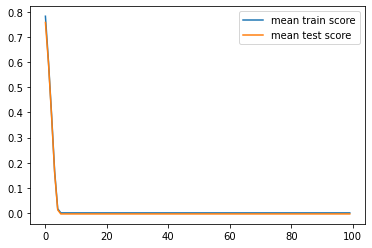

In [60]:
cv_results['mean_train_score'].plot(label='mean train score')
cv_results['mean_test_score'].plot(label='mean test score')
plt.legend(loc=1)

### Lasso model (user provides alpha)

In [81]:
lasso2 = Lasso(alpha=1e-02,normalize=True)
lasso2.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [82]:
lasso2.fit(Xtrain,ytrain)

Lasso(alpha=0.01, normalize=True)

In [83]:
print('Train score: ', lasso2.score(Xtrain,ytrain))
print('Test score: ', lasso2.score(Xtest,ytest))

Train score:  0.770026302971569
Test score:  0.7463175067097554


In [84]:
lasso2.score(Xtest,ytest)

0.7463175067097554

In [85]:
print('the intercept is: %.2f' %(lasso2.intercept_))
coefs = pd.Series(lasso2.coef_, index=housefeature.columns)

the intercept is: -509.65


In [86]:
coefs.sort_values(ascending=False).head(50)

ExterQual             4.502131
OverallQual           4.453966
OverallCond           4.180341
BsmtExposure          3.466801
MasVnrType__Stone     3.298233
GarageCars            3.236452
KitchenQual           2.312802
LotConfig__CulDSac    1.884570
BsmtFinType1          1.870953
BsmtQual              1.784177
HeatingQC             1.200427
Condition1__PosN      0.965466
CentralAir            0.797142
GarageType__Detchd    0.763168
Heating__Wall         0.633825
YearBuilt             0.256115
YearRemodAdd          0.034202
TotalBath             0.012889
ScreenPorch           0.008264
WoodDeckSF            0.000538
Foundation__Slab      0.000000
3SsnPorch            -0.000000
PoolArea              0.000000
Foundation__PConc     0.000000
Fence                 0.000000
MasVnrType__0        -0.000000
EnclosedPorch        -0.000000
Foundation__BrkTil   -0.000000
MasVnrType__BrkCmn   -0.000000
ISU_dist             -0.000000
OpenPorchSF          -0.000000
PavedDrive            0.000000
GarageQu

### Calculate RMSE

In [75]:
mse = np.mean((lasso2.predict(Xtest)-ytest)**2)
mse

221.5121932337364

In [76]:
RMSE = np.sqrt(mse)
RMSE

14.88328570019861

### Using `cross_val_score`

In [66]:
import sklearn.model_selection as ms
scores = ms.cross_val_score(estimator=lasso2, X=Xtrain, y=ytrain, cv=5)
scores = pd.Series(scores)

In [67]:
print(scores.round(3))
print('-'*40)
print('Score Mean %.3f' %(scores.mean()))
print('Score std deviation: %.3f' %(scores.std()))

0    0.865
1    0.879
2    0.869
3    0.882
4    0.846
dtype: float64
----------------------------------------
Score Mean 0.868
Score std deviation: 0.014
